# SpotiData Project 
# ------------------------

# The most streamed songs of all time

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from pprint import pprint
import requests
from config import ClientID,ClientSecret

In [3]:
#Import csv
songs_csv=pd.read_csv("Resources/Most-Streamed-Songs-All-Time.csv")
songs_csv.head()

,#,Cover,Artist,Title,Streams,Daily,Year
0,1,NaN,Ed Sheeran,Shape of You,"3,568,884,811","957,825",2017
1,2,NaN,Ed Sheeran,Perfect,"2,992,732,560","1,391,839",2017
2,3,NaN,Luis Fonsi,Despacito,"2,977,102,893","693,132",2017
3,4,NaN,The Weeknd,Blinding Lights,"2,974,748,777","1,730,130",2019
4,5,NaN,Tones And I,Dance Monkey,"2,576,954,079","799,995",2019


In [4]:
#format
songs_csv.rename(columns={"#":"Ranking"},inplace=True)
songs_csv.head()

,Ranking,Cover,Artist,Title,Streams,Daily,Year
0,1,NaN,Ed Sheeran,Shape of You,"3,568,884,811","957,825",2017
1,2,NaN,Ed Sheeran,Perfect,"2,992,732,560","1,391,839",2017
2,3,NaN,Luis Fonsi,Despacito,"2,977,102,893","693,132",2017
3,4,NaN,The Weeknd,Blinding Lights,"2,974,748,777","1,730,130",2019
4,5,NaN,Tones And I,Dance Monkey,"2,576,954,079","799,995",2019


In [5]:
# remove columns we don't need
songs = songs_csv[["Ranking","Artist","Title","Streams","Daily","Year"]]
songs.head()

,Ranking,Artist,Title,Streams,Daily,Year
0,1,Ed Sheeran,Shape of You,"3,568,884,811","957,825",2017
1,2,Ed Sheeran,Perfect,"2,992,732,560","1,391,839",2017
2,3,Luis Fonsi,Despacito,"2,977,102,893","693,132",2017
3,4,The Weeknd,Blinding Lights,"2,974,748,777","1,730,130",2019
4,5,Tones And I,Dance Monkey,"2,576,954,079","799,995",2019


In [6]:
# from which year are the most played songs on spotify?
years = songs["Year"].value_counts()
years

2017    10
2019    10
2018    10
2016     8
2015     3
2013     2
2014     2
2020     2
1975     1
2012     1
2021     1
Name: Year, dtype: int64

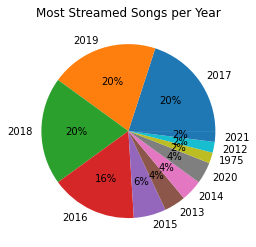

In [130]:
#PIE CHART Most Streamed Songs per Year
pct_year = plt.pie(years, labels=years.index, autopct='%1.0f%%') 
plt.title("Most Streamed Songs per Year")
plt.savefig("Figures/MostStreamedSongs/Most Streamed Songs per Year.png")

## Spotify API

In [8]:
#API KEY - API AUTH
# ClientID and ClientSecret in config.py 
# !!!!! to make it work, you should have your own config.py

AUTH_URL = "https://accounts.spotify.com/api/token"
auth_response = requests.post(AUTH_URL, {
    'grant_type': 'client_credentials',
    'client_id': ClientID,
    'client_secret': ClientSecret,
})

#Convert response to JSON
auth_response_data = auth_response.json()

#Save the access token
access_token = auth_response_data['access_token']

#Need to pass access token into header to send properly formed GET request to API server
headers = {
    'Authorization': 'Bearer {token}'.format(token=access_token)
}

In [9]:
#url
BASE_URL = 'https://api.spotify.com/v1/' 
search_BASE_URL=f"{BASE_URL}search?"

In [10]:
#test
searchtype="track"
params={"q":"Shape of You",
       "type":{searchtype}}
# headers = api key
info=requests.get(search_BASE_URL ,params=params, headers=headers).json()
pprint(info)

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=Shape+of+You&type=track&offset=0&limit=20',
            'items': [{'album': {'album_type': 'album',
                                 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6eUKZXaKkcviH0Ku9w2n3V'},
                                              'href': 'https://api.spotify.com/v1/artists/6eUKZXaKkcviH0Ku9w2n3V',
                                              'id': '6eUKZXaKkcviH0Ku9w2n3V',
                                              'name': 'Ed Sheeran',
                                              'type': 'artist',
                                              'uri': 'spotify:artist:6eUKZXaKkcviH0Ku9w2n3V'}],
                                 'available_markets': ['AD',
                                                       'AE',
                                                       'AG',
                                                       'AL',
                                        

                       'is_local': False,
                       'name': 'Shape of You',
                       'popularity': 54,
                       'preview_url': 'https://p.scdn.co/mp3-preview/ffb3772d386be43d980a51a72d14d308577edf4a?cid=e7100ece7d90481c97b4a4d9d31be538',
                       'track_number': 1,
                       'type': 'track',
                       'uri': 'spotify:track:54SMw8TnDcuieolVRXBmni'},
                      {'album': {'album_type': 'album',
                                 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/06HL4z0CvFAxyc27GXpf02'},
                                              'href': 'https://api.spotify.com/v1/artists/06HL4z0CvFAxyc27GXpf02',
                                              'id': '06HL4z0CvFAxyc27GXpf02',
                                              'name': 'Taylor Swift',
                                              'type': 'artist',
                                              'uri'

                                              'uri': 'spotify:artist:6eUKZXaKkcviH0Ku9w2n3V'}],
                                 'available_markets': ['AD',
                                                       'AE',
                                                       'AG',
                                                       'AL',
                                                       'AM',
                                                       'AO',
                                                       'AR',
                                                       'AT',
                                                       'AU',
                                                       'AZ',
                                                       'BA',
                                                       'BB',
                                                       'BD',
                                                       'BE',
                                                  

                                                       'BZ',
                                                       'CA',
                                                       'CD',
                                                       'CG',
                                                       'CH',
                                                       'CI',
                                                       'CL',
                                                       'CM',
                                                       'CO',
                                                       'CR',
                                                       'CV',
                                                       'CW',
                                                       'CY',
                                                       'CZ',
                                                       'DE',
                                                       'DJ',
                        

                                                       'SM',
                                                       'SN',
                                                       'SR',
                                                       'ST',
                                                       'SV',
                                                       'SZ',
                                                       'TD',
                                                       'TG',
                                                       'TH',
                                                       'TJ',
                                                       'TL',
                                                       'TN',
                                                       'TO',
                                                       'TR',
                                                       'TT',
                                                       'TV',
                        

                                             'TH',
                                             'TJ',
                                             'TL',
                                             'TN',
                                             'TO',
                                             'TR',
                                             'TT',
                                             'TV',
                                             'TW',
                                             'TZ',
                                             'UA',
                                             'UG',
                                             'US',
                                             'UY',
                                             'UZ',
                                             'VC',
                                             'VE',
                                             'VN',
                                             'VU',
                               

                                 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6eUKZXaKkcviH0Ku9w2n3V'},
                                              'href': 'https://api.spotify.com/v1/artists/6eUKZXaKkcviH0Ku9w2n3V',
                                              'id': '6eUKZXaKkcviH0Ku9w2n3V',
                                              'name': 'Ed Sheeran',
                                              'type': 'artist',
                                              'uri': 'spotify:artist:6eUKZXaKkcviH0Ku9w2n3V'},
                                             {'external_urls': {'spotify': 'https://open.spotify.com/artist/4sTQVOfp9vEMCemLw50sbu'},
                                              'href': 'https://api.spotify.com/v1/artists/4sTQVOfp9vEMCemLw50sbu',
                                              'id': '4sTQVOfp9vEMCemLw50sbu',
                                              'name': 'Galantis',
                                              'type':

                                                       'GD',
                                                       'GE',
                                                       'GH',
                                                       'GM',
                                                       'GN',
                                                       'GQ',
                                                       'GR',
                                                       'GT',
                                                       'GW',
                                                       'GY',
                                                       'HK',
                                                       'HN',
                                                       'HR',
                                                       'HT',
                                                       'HU',
                                                       'ID',
                        

                                    'id': '06HL4z0CvFAxyc27GXpf02',
                                    'name': 'Taylor Swift',
                                    'type': 'artist',
                                    'uri': 'spotify:artist:06HL4z0CvFAxyc27GXpf02'}],
                       'available_markets': ['AD',
                                             'AE',
                                             'AG',
                                             'AL',
                                             'AM',
                                             'AO',
                                             'AR',
                                             'AT',
                                             'AU',
                                             'AZ',
                                             'BA',
                                             'BB',
                                             'BD',
                                             'BE',
                  

In [11]:
#get track ID
track_id=info["tracks"]['items'][0]['id']
track_id

'7qiZfU4dY1lWllzX7mPBI3'

In [12]:
# check song with ID
# https://open.spotify.com/track/7qiZfU4dY1lWllzX7mPBI3 

### GET Audio Analysis

In [13]:
# TEST
# https://developer.spotify.com/console/get-audio-features-several-tracks/?ids=7qiZfU4dY1lWllzX7mPBI3 
# curl -X "GET" "https://api.spotify.com/v1/audio-features?ids=7qiZfU4dY1lWllzX7mPBI3"

feature_url = BASE_URL + "audio-features?ids="
song_analysis=requests.get(feature_url+track_id, headers=headers).json()
pprint(song_analysis)

{'audio_features': [{'acousticness': 0.581,
                     'analysis_url': 'https://api.spotify.com/v1/audio-analysis/7qiZfU4dY1lWllzX7mPBI3',
                     'danceability': 0.825,
                     'duration_ms': 233713,
                     'energy': 0.652,
                     'id': '7qiZfU4dY1lWllzX7mPBI3',
                     'instrumentalness': 0,
                     'key': 1,
                     'liveness': 0.0931,
                     'loudness': -3.183,
                     'mode': 0,
                     'speechiness': 0.0802,
                     'tempo': 95.977,
                     'time_signature': 4,
                     'track_href': 'https://api.spotify.com/v1/tracks/7qiZfU4dY1lWllzX7mPBI3',
                     'type': 'audio_features',
                     'uri': 'spotify:track:7qiZfU4dY1lWllzX7mPBI3',
                     'valence': 0.931}]}


In [14]:
# test: ask one feature
song_analysis["audio_features"][0]["acousticness"]

0.581

## Function look_for_id of ONE song

In [22]:
# Function that ask to the API the ID of a song
def look_for_id(song):
    
    try:
        url = 'https://api.spotify.com/v1/search?' 
        search_type = "track"
        params = {"q":{song},
                  "type":{search_type}}
        info = requests.get(url, params=params, headers=headers).json()
        track_id = info["tracks"]['items'][0]['id']
        #return track_id
    
    except (KeyError, IndexError):                                                  
        track_id = "nan"
    
    return track_id

In [23]:
# LIST of most streamed songs
only_songs = songs["Title"]
only_songs[10]

'Sunflower - Spider-Man: Into the Spider-Verse'

In [24]:
# TEST function
look_for_id(only_songs[10])

'3KkXRkHbMCARz0aVfEt68P'

In [25]:
# TEST function error
look_for_id("blableblibloblu")

'nan'

## Function look for ID for a LIST of songs

In [26]:
# function that receives a list of songs and returns a list of spotify ids for those songs
def list_of_ids(songs):
    list_ids = []
    for song in songs:
        song_id = look_for_id(song)
        list_ids.append(song_id)
    return list_ids

### GET list songs ID

In [27]:
list_songs_ids = list_of_ids(only_songs)
list_songs_ids

['7qiZfU4dY1lWllzX7mPBI3',
 '0tgVpDi06FyKpA1z0VMD4v',
 '6habFhsOp2NvshLv26DqMb',
 '0VjIjW4GlUZAMYd2vXMi3b',
 '2XU0oxnq2qxCpomAAuJY8K',
 '0e7ipj03S05BNilyu5bRzt',
 '7qEHsqek33rTcFNT9PFqLf',
 '2YpeDb67231RjR0MgVLzsG',
 '2Fxmhks0bxGSBdJ92vM42m',
 '7BKLCZ1jbUBVqRi2FVlTVw',
 '3KkXRkHbMCARz0aVfEt68P',
 '1zi7xx7UVEFkmKfv06H8x0',
 '0pqnGHJpmpxLKifKRmU6WP',
 '6gBFPUFcJLzWGx4lenP6h2',
 '2eookY4b8oNv2Y6GFzklqS',
 '5uCax9HTNlzGybIStD3vDh',
 '3U4isOIWM3VvDubwSI3y7a',
 '34gCuhDGsG4bRPIf9bb02f',
 '1rfofaqEpACxVEHIZBJe6W',
 '3S4px9f4lceWdKf0gWciFu',
 '3PfIrDoz19wz7qK7tYeu62',
 '285pBltuF7vW8TeWk8hdRR',
 '6DCZcSspjsKoFjzjrWoCdn',
 '6RUKPb4LETWmmr3iAEQktW',
 '1HNkqx9Ahdgi1Ixy2xkKkL',
 '7tFiyTwD0nx5a1eklYtX2J',
 '7MXVkk9YMctZqd1Srtv4MB',
 '5nujrmhLynf4yMoMtj8AQF',
 '1zB4vmk8tFRmM9UULNzbLB',
 '7KXjTSCq5nL1LoYtL7XAwS',
 '3ee8Jmje8o58CHK66QrVC2',
 '1i1fxkWeaMmKEB4T7zqbzK',
 '2ekn2ttSfGqwhhate0LSR0',
 '4VHkjPgAis9JNfc1URn7zZ',
 '1CS7Sd1u5tWkstBhpssyjP',
 '2VxeLyX666F8uXCJ0dZF8B',
 '3vv9phIu6Y1vX3jcqaGz5Z',
 

## Function Audio Analysis

In [28]:
def audio_features(list_songs_id):
    
    AUTH_URL = "https://accounts.spotify.com/api/token"
    auth_response = requests.post(AUTH_URL, {
        'grant_type': 'client_credentials',
        'client_id': ClientID,
        'client_secret': ClientSecret,    })
    auth_response_data = auth_response.json()
    access_token = auth_response_data['access_token']
    headers = {'Authorization': 'Bearer {token}'.format(token=access_token) }
    #AUTH####################################################################

    feature_url = "https://api.spotify.com/v1/audio-features?ids="
    
    acousticness = []
    danceability = []
    duration_ms = []
    energy = []
    instrumentalness = []
    liveness = []
    loudness = []
    speechiness = []
    tempo = []
    valence = []
    
    for song_id in list_songs_id:
        
        song_analysis = requests.get(feature_url+song_id, headers=headers).json()
        
        #FEATURES
        acousticness.append(song_analysis["audio_features"][0]["acousticness"])
        danceability.append(song_analysis["audio_features"][0]["danceability"])
        duration_ms.append(song_analysis["audio_features"][0]["duration_ms"])
        energy.append(song_analysis["audio_features"][0]["energy"])
        instrumentalness.append(song_analysis["audio_features"][0]["instrumentalness"])
        liveness.append(song_analysis["audio_features"][0]["liveness"])
        loudness.append(song_analysis["audio_features"][0]["loudness"])
        speechiness.append(song_analysis["audio_features"][0]["speechiness"])
        tempo.append(song_analysis["audio_features"][0]["tempo"])
        valence.append(song_analysis["audio_features"][0]["valence"])

    # CREATE DICTIONARY    
    audio_features_dic = {
                            "Song_ID" : list_songs_id,
                            "Acousticness" : acousticness,
                            "Danceability" : danceability,
                            "Duration" : duration_ms,
                            "Energy" : energy,
                            "Instrumentalness" : instrumentalness,
                            "Liveness" : liveness,
                            "Loudness" : loudness,
                            "Speechiness" : speechiness,
                            "Tempo" : tempo,
                            "Valence" : valence
    }
    
    #CREATE DATAFRAME
    audio_features_df = pd.DataFrame(audio_features_dic)
    return audio_features_df


### GET Audio Analysis

In [29]:
audio_features_df = audio_features(list_songs_ids)
audio_features_df

,Song_ID,Acousticness,Danceability,Duration,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence
0,7qiZfU4dY1lWllzX7mPBI3,0.581000,0.825,233713,0.652,0.000000,0.0931,-3.183,0.0802,95.977,0.931
1,0tgVpDi06FyKpA1z0VMD4v,0.163000,0.599,263400,0.448,0.000000,0.1060,-6.312,0.0232,95.050,0.168
2,6habFhsOp2NvshLv26DqMb,0.198000,0.655,229360,0.797,0.000000,0.0670,-4.787,0.1530,177.928,0.839
3,0VjIjW4GlUZAMYd2vXMi3b,0.001460,0.514,200040,0.730,0.000095,0.0897,-5.934,0.0598,171.005,0.334
4,2XU0oxnq2qxCpomAAuJY8K,0.692000,0.824,209438,0.588,0.000104,0.1490,-6.400,0.0924,98.027,0.513
5,0e7ipj03S05BNilyu5bRzt,0.124000,0.585,218147,0.520,0.000070,0.1310,-6.136,0.0712,159.801,0.129
6,7qEHsqek33rTcFNT9PFqLf,0.751000,0.501,182161,0.405,0.000000,0.1050,-5.679,0.0319,109.891,0.446
7,2YpeDb67231RjR0MgVLzsG,0.053300,0.878,157067,0.619,0.000000,0.1130,-5.560,0.1020,136.041,0.639
8,2Fxmhks0bxGSBdJ92vM42m,0.328000,0.701,194088,0.425,0.130000,0.1000,-10.965,0.3750,135.128,0.562
9,7BKLCZ1jbUBVqRi2FVlTVw,0.414000,0.748,244960,0.524,0.000000,0.1110,-5.599,0.0338,95.010,0.661


In [33]:
# add song_ID to df1 (songs)
songs["Song_ID"] = list_songs_ids
songs.head()

,Ranking,Artist,Title,Streams,Daily,Year,Song_ID
0,1,Ed Sheeran,Shape of You,"3,568,884,811","957,825",2017,7qiZfU4dY1lWllzX7mPBI3
1,2,Ed Sheeran,Perfect,"2,992,732,560","1,391,839",2017,0tgVpDi06FyKpA1z0VMD4v
2,3,Luis Fonsi,Despacito,"2,977,102,893","693,132",2017,6habFhsOp2NvshLv26DqMb
3,4,The Weeknd,Blinding Lights,"2,974,748,777","1,730,130",2019,0VjIjW4GlUZAMYd2vXMi3b
4,5,Tones And I,Dance Monkey,"2,576,954,079","799,995",2019,2XU0oxnq2qxCpomAAuJY8K


### Merge base df with Spotify API df

In [59]:
# merge df1 with df2 by ID
songs_analysed = pd.merge(songs, audio_features_df, left_on="Song_ID", right_on="Song_ID")
songs_analysed.head()

,Ranking,Artist,Title,Streams,Daily,Year,Song_ID,Acousticness,Danceability,Duration,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence
0,1,Ed Sheeran,Shape of You,"3,568,884,811","957,825",2017,7qiZfU4dY1lWllzX7mPBI3,0.58100,0.825,233713,0.652,0.000000,0.0931,-3.183,0.0802,95.977,0.931
1,2,Ed Sheeran,Perfect,"2,992,732,560","1,391,839",2017,0tgVpDi06FyKpA1z0VMD4v,0.16300,0.599,263400,0.448,0.000000,0.1060,-6.312,0.0232,95.050,0.168
2,3,Luis Fonsi,Despacito,"2,977,102,893","693,132",2017,6habFhsOp2NvshLv26DqMb,0.19800,0.655,229360,0.797,0.000000,0.0670,-4.787,0.1530,177.928,0.839
3,4,The Weeknd,Blinding Lights,"2,974,748,777","1,730,130",2019,0VjIjW4GlUZAMYd2vXMi3b,0.00146,0.514,200040,0.730,0.000095,0.0897,-5.934,0.0598,171.005,0.334
4,5,Tones And I,Dance Monkey,"2,576,954,079","799,995",2019,2XU0oxnq2qxCpomAAuJY8K,0.69200,0.824,209438,0.588,0.000104,0.1490,-6.400,0.0924,98.027,0.513


In [82]:
#CHANGE DURATION = milliseconds to minutes
songs_analysed["Duration"] = songs_analysed["Duration"]/60000
songs_analysed.head()

,Ranking,Artist,Title,Streams,Daily,Year,Song_ID,Acousticness,Danceability,Duration,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence
0,1,Ed Sheeran,Shape of You,"3,568,884,811","957,825",2017,7qiZfU4dY1lWllzX7mPBI3,0.58100,0.825,1.082005e-09,0.652,0.000000,0.0931,-3.183,0.0802,95.977,0.931
1,2,Ed Sheeran,Perfect,"2,992,732,560","1,391,839",2017,0tgVpDi06FyKpA1z0VMD4v,0.16300,0.599,1.219444e-09,0.448,0.000000,0.1060,-6.312,0.0232,95.050,0.168
2,3,Luis Fonsi,Despacito,"2,977,102,893","693,132",2017,6habFhsOp2NvshLv26DqMb,0.19800,0.655,1.061852e-09,0.797,0.000000,0.0670,-4.787,0.1530,177.928,0.839
3,4,The Weeknd,Blinding Lights,"2,974,748,777","1,730,130",2019,0VjIjW4GlUZAMYd2vXMi3b,0.00146,0.514,9.261111e-10,0.730,0.000095,0.0897,-5.934,0.0598,171.005,0.334
4,5,Tones And I,Dance Monkey,"2,576,954,079","799,995",2019,2XU0oxnq2qxCpomAAuJY8K,0.69200,0.824,9.696204e-10,0.588,0.000104,0.1490,-6.400,0.0924,98.027,0.513


In [70]:
descr = songs_analysed.describe()
descr

,Ranking,Year,Acousticness,Danceability,Duration,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,2016.300000,0.268803,0.657280,3.630141,0.596040,0.005734,0.157210,-6.254540,0.089044,118.690740,0.472700
std,14.57738,6.257241,0.286781,0.145552,0.675247,0.166222,0.026065,0.107706,1.955397,0.081067,30.584923,0.213816
min,1.00000,1975.000000,0.000085,0.332000,2.363433,0.225000,0.000000,0.067000,-10.965000,0.023200,74.897000,0.120000
25%,13.25000,2016.000000,0.037325,0.567500,3.195700,0.456500,0.000000,0.095025,-7.061750,0.036050,95.843500,0.328000
50%,25.50000,2017.000000,0.149000,0.687500,3.531450,0.620000,0.000000,0.119500,-5.806500,0.054850,112.587500,0.446000
75%,37.75000,2018.750000,0.459000,0.764250,3.971754,0.729500,0.000080,0.152000,-5.052000,0.102000,139.046250,0.603750
max,50.00000,2021.000000,0.934000,0.908000,5.905333,0.869000,0.134000,0.552000,-3.183000,0.375000,186.003000,0.931000


### Median


In [80]:
median = descr.loc["50%"]
median

Ranking               25.50000
Year                2017.00000
Acousticness           0.14900
Danceability           0.68750
Duration               3.53145
Energy                 0.62000
Instrumentalness       0.00000
Liveness               0.11950
Loudness              -5.80650
Speechiness            0.05485
Tempo                112.58750
Valence                0.44600
Name: 50%, dtype: float64

## Medians  +  documentation of features meanings


### acousticness = 0.14900
A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

### danceability = 0.68750  (most danceable)
Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
 
### duration = 3.53145
The duration of the track in milliseconds. (I have changed it to minutes)
  
### energy = 0.62000 (energetic tracks)
Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
 
### instrumentalness = 0.00000 (mostly vocal content)
Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

### liveness = 0.11950  
Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
 
### loudness = -5.80650
The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.
 
### speechiness = 0.05485  
Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

### tempo = 112.58750 (moderate)
The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
moderate is 108–120 BPM
fast is 120–168 BPM
faster is 168–200 BPM

### valence = 0.44600
A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).


In [68]:
songs_analysed.columns

Index(['Ranking', 'Artist', 'Title', 'Streams', 'Daily', 'Year', 'Song_ID',
       'Acousticness', 'Danceability', 'Duration', 'Energy',
       'Instrumentalness', 'Liveness', 'Loudness', 'Speechiness', 'Tempo',
       'Valence'],
      dtype='object')

In [ ]:
columns_analysis = ['Acousticness', 'Danceability', 'Duration', 'Energy',
       'Instrumentalness', 'Liveness', 'Loudness', 'Speechiness', 'Tempo', 'Valence']


## Looking for correlations 

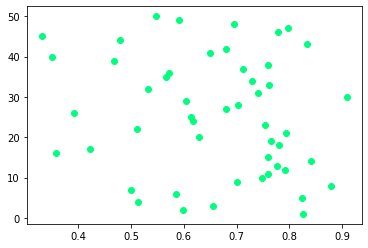

In [159]:
#plots
plt.scatter(songs_analysed["Danceability"], songs_analysed["Ranking"], marker="o", color="springgreen")

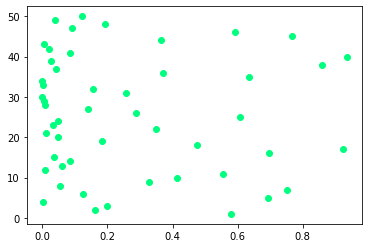

In [160]:
plt.scatter(songs_analysed["Acousticness"], songs_analysed["Ranking"], marker="o", color="springgreen")

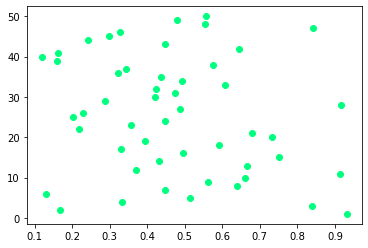

In [161]:
plt.scatter(songs_analysed["Valence"], songs_analysed["Ranking"], marker="o", color="springgreen")

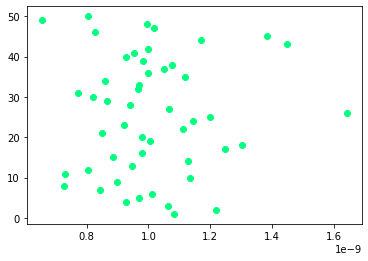

In [162]:
plt.scatter(songs_analysed["Duration"], songs_analysed["Ranking"], marker="o", color="springgreen")

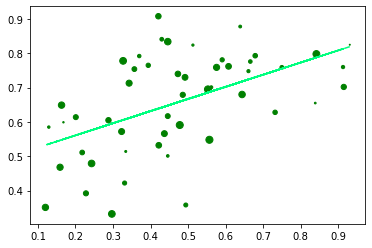

In [163]:
plt.scatter(songs_analysed["Valence"], songs_analysed["Danceability"], 
            marker="o", color="green", s=songs_analysed["Ranking"])

slope, intercept, r, p, se = st.linregress(songs_analysed["Valence"],songs_analysed["Danceability"])
y_fit = slope* songs_analysed["Valence"] + intercept
plt.plot(songs_analysed["Valence"], y_fit, "--", color="springgreen")


## Distribution Analysis with hist()

Text(0.5, 1.0, 'Most Streamed Songs: Danceability Distribution')

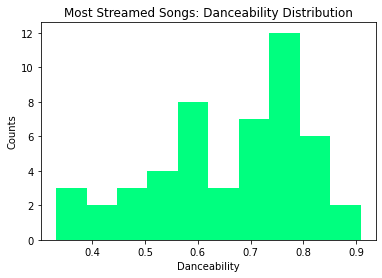

In [164]:
plt.hist(songs_analysed["Danceability"], color="springgreen")
plt.xlabel("Danceability")
plt.ylabel("Counts")
plt.title("Most Streamed Songs: Danceability Distribution")

In [165]:
st.normaltest(songs_analysed["Danceability"])

NormaltestResult(statistic=3.2530523141437695, pvalue=0.19661138626087674)

Text(0.5, 1.0, 'Most Streamed Songs: Duration Distribution')

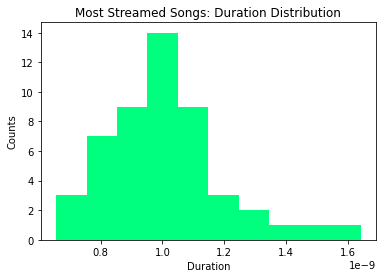

In [166]:
plt.hist(songs_analysed["Duration"], color="springgreen")
plt.xlabel("Duration")
plt.ylabel("Counts")                   # CHECK X !!!!!!!!!!!!!!!!!!
fontdict = {'fontsize': 16}
plt.title("Duration Distribution \n of Most Streamed Songs", fontdict=fontdict)
#plt.savefig("Figures/MostStreamedSongs/Valence Distribution.png")

In [167]:
st.normaltest(songs_analysed["Duration"])

NormaltestResult(statistic=12.11705002878813, pvalue=0.002337846635826582)

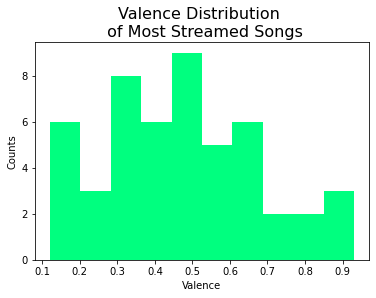

In [168]:
plt.hist(songs_analysed["Valence"], color="springgreen")
plt.xlabel("Valence")
plt.ylabel("Counts")
fontdict = {'fontsize': 16}
plt.title("Valence Distribution \n of Most Streamed Songs", fontdict=fontdict)
plt.savefig("Figures/MostStreamedSongs/Valence Distribution.png")